# Graduates Demographics Findings May 2024 

# Instructions:
#A recruiting firm (Gazelle Recruiting) has just received a data file from a college campus with over 
#two hundred graduates who have received job offers. The data file gives a good deal of information about 
#these graduates, ranging from how well they did in grade school, high school, college etc. 
#The file also contains the salary the graduates were offered for their jobs and whether they were placed or not.

#The recruiting firm has no experience reading datasets. 
#They don’t have an idea of who these graduates are in terms of demographics. 
#Senior management have asked for your guidance. They have provided a data file and a data dictionary. 
#The data dictionary contains a list of fields in the dataset and an explanation for each one.

In [3]:
#I imported libraries I needed to complete this analysis.
#The Numpy library to create arrays, do shape manipulations, random simulations, and other operations.
import numpy as np
#The Pandas library to analyze, clean, and manipulate data. 
import pandas as pd
#The Matplotlib library to create, plot, and label figures.
import matplotlib.pyplot as plt
#The Seaborn library to make graphics.
import seaborn as sb
#The Sklearn library to implement modelling for regression.
import sklearn 

In [4]:
#I created a data frame using the provided csv file.
df_placement = pd.read_csv('Placement.csv')

In [5]:
#I printed the first few rows of the data frame to ensure the data imported properly.
df_placement.head(30)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,270000.0,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,200000.0,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,250000.0,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,NaN,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,425000.0,Placed
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,NaN,Not Placed
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,NaN,Not Placed
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,252000.0,Placed
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,231000.0,Placed
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,NaN,Not Placed


# 1. Cleanse
#Look for null data in the table, and use the appropriate strategy to handle null data for each column. 
#Explain why this was the strategy that you used.

In [6]:
#This confirms that all the columns that are supposed to be numeric have entirely numeric values.
#This also confirms that there are some null values in the dataframe. Because there are 215 rows,
#there should be 215 non-null objects for every column.
#But there are 2 null values in the hsc_p column, 1 in the hsc_s column,
#1 in the specialisation column, and 67 in the salary column.
df_placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           213 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           214 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  214 non-null    object 
 12  mba_p           215 non-null    float64
 13  salary          148 non-null    float64
 14  status          215 non-null    object 
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [7]:
#After completing this analysis, I came to the conclusion that the salary data had no significant correlations to 
#the target variable, status, or any other data. Therefore, because of it's unimportance and 
#significant null values, I deleted the column.

In [8]:
df_placement = df_placement.drop('salary', axis=1)

In [9]:
#I dropped the Serial Number column, as it is only a marker and not an indication fo value. 
#It would not be useful for analyzing data.
df_placement = df_placement.drop('sl_no', axis=1)

In [10]:
#This confirms it worked.
df_placement

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [11]:
#These commands confirm the rows of the remaining null values in each column.

In [12]:
df_placement[df_placement['gender'].isnull()].index.tolist()

[]

In [13]:
df_placement[df_placement['ssc_p'].isnull()].index.tolist()

[]

In [14]:
df_placement[df_placement['ssc_b'].isnull()].index.tolist()

[]

In [15]:
df_placement[df_placement['hsc_p'].isnull()].index.tolist()

[16, 31]

In [16]:
df_placement[df_placement['hsc_b'].isnull()].index.tolist()

[]

In [17]:
df_placement[df_placement['hsc_s'].isnull()].index.tolist()

[14]

In [18]:
df_placement[df_placement['degree_p'].isnull()].index.tolist()

[]

In [19]:
df_placement[df_placement['degree_t'].isnull()].index.tolist()

[]

In [20]:
df_placement[df_placement['workex'].isnull()].index.tolist()

[]

In [21]:
df_placement[df_placement['etest_p'].isnull()].index.tolist()

[]

In [22]:
df_placement[df_placement['etest_p'].isnull()].index.tolist()

[]

In [23]:
df_placement[df_placement['specialisation'].isnull()].index.tolist()

[11]

In [24]:
df_placement[df_placement['mba_p'].isnull()].index.tolist()

[]

In [25]:
df_placement[df_placement['status'].isnull()].index.tolist()

[]

In [26]:
#Because there are so few remaining null values, I dropped the rows with missing values. 
#This ensures that analysis processes run properly.

In [27]:
#This creates a second dataframe to preserve the original completed data frame.
#This also deletes the rows located in each column with null values.
df = df_placement.drop(index=[11,14,16,31])

In [28]:
#store indexes and get those back - never use hard coding - data wrangling2

In [29]:
#This confirms that the rows were dropped and there are now no null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          211 non-null    object 
 1   ssc_p           211 non-null    float64
 2   ssc_b           211 non-null    object 
 3   hsc_p           211 non-null    float64
 4   hsc_b           211 non-null    object 
 5   hsc_s           211 non-null    object 
 6   degree_p        211 non-null    float64
 7   degree_t        211 non-null    object 
 8   workex          211 non-null    object 
 9   etest_p         211 non-null    float64
 10  specialisation  211 non-null    object 
 11  mba_p           211 non-null    float64
 12  status          211 non-null    object 
dtypes: float64(5), object(8)
memory usage: 23.1+ KB


In [30]:
#Conclusion: The salary and serial number columns were deleted, as well as scattered rows with null values.
#The data is now cleaned and ready for finding outliers.

# 2. Outliers
#Search the data for outliers and remove them. Use the appropriate outlier method(s). Show all work.

In [76]:
#I used the IQR method to find and remove outliers for numerical columns.
#I used the cascading method to define and build upon dataframes after the ouliers are eliminated.

In [78]:
#narrow down to numerics before going to outliers, outliers should not contain numerics.
#only worked b/c mac

In [77]:
#This finds the Inter Quartile Range (IQR), the middle of the range between quantile 1 and quantile 3.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
#This subtracts Q3 from Q1 for the desired range of data for the table.
IQR = Q3 - Q1
print(IQR)

ssc_p       15.400
hsc_p       12.000
degree_p    11.000
etest_p     24.000
mba_p        8.425
dtype: float64


/var/folders/cx/ndynydkj54q63s73qyhrjc480000gn/T/ipykernel_1265/2004389384.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
/var/folders/cx/ndynydkj54q63s73qyhrjc480000gn/T/ipykernel_1265/2004389384.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


In [33]:
#This defines the Q1 data for the table.
Q1

ssc_p       60.600
hsc_p       61.000
degree_p    61.000
etest_p     60.000
mba_p       57.945
Name: 0.25, dtype: float64

In [34]:
#This defines the Q3 data for the table.
Q3

ssc_p       76.00
hsc_p       73.00
degree_p    72.00
etest_p     84.00
mba_p       66.37
Name: 0.75, dtype: float64

In [35]:
#Secondary Education percentile

In [36]:
#This subtracts Q3 from Q1 for the desired range of data for the ssc_p column.
IQR_ssc_p =  Q3['ssc_p'] - Q1['ssc_p']
IQR_ssc_p 

15.400000000000006

In [37]:
#This defines the above and below variables subtracting and adding the standard 1.5 times the IQR to calculate the lower and upper bounds.
below = Q1['ssc_p'] - 1.5 * IQR_ssc_p
above = Q3['ssc_p'] + 1.5 * IQR_ssc_p

In [38]:
#This creates a new data frame and finds data in the column that is greater than below or less than the bounds.
df1 = df.loc[(df['ssc_p'] > below)  | (df['ssc_p'] < above)] 

In [39]:
#This narrows the data in the column to only the data within the bounds and excludes outliers.
df_no_outlier = df.loc[(df['ssc_p'] >= below) & (df['ssc_p'] <= above)] 

In [40]:
#This shows the difference in data frame shape between the previous and new data frames.
df.shape, df_no_outlier.shape

((211, 13), (210, 13))

<Axes: >

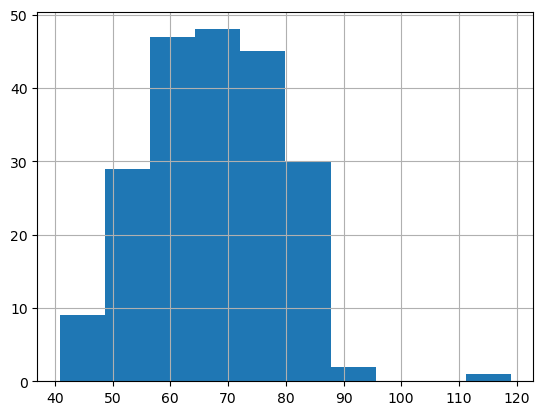

In [41]:
#This shows the original column data with the outliers.
df['ssc_p'].hist()

<Axes: >

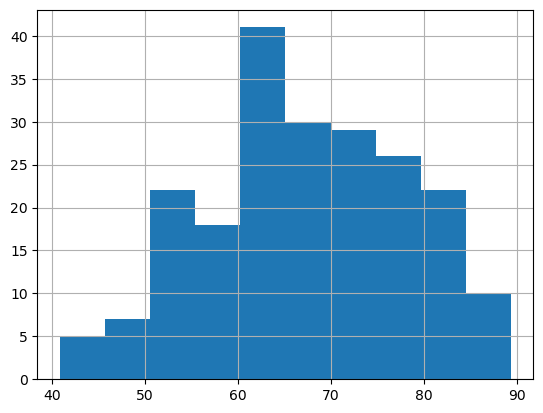

In [42]:
#This shows the new column data with no outliers.
df_no_outlier['ssc_p'].hist()

In [43]:
#Higher Secondary Education percentile

In [44]:
#This subtracts Q3 from Q1 for the desired range of data for the hsc_p column.
IQR_hsc_p =  Q3['hsc_p'] - Q1['hsc_p']
IQR_hsc_p 

12.0

In [45]:
#This defines the above and below variables subtracting and adding the standard 1.5 times the IQR to calculate the lower and upper bounds.
below = Q1['hsc_p'] - 1.5 * IQR_hsc_p 
above = Q3['hsc_p'] + 1.5 * IQR_hsc_p 

In [46]:
#This creates a new data frame and finds data in the column that is greater than below or less than the bounds.
#This narrows the data in the column to only the data within the bounds and excludes outliers.
df_no_outlier2 = df_no_outlier.loc[(df_no_outlier['hsc_p'] >= below) & (df_no_outlier['hsc_p'] <= above)] 

In [47]:
#This shows the difference in data frame shape between the previous and new data frames.
df_no_outlier.shape, df_no_outlier2.shape

((210, 13), (202, 13))

<Axes: >

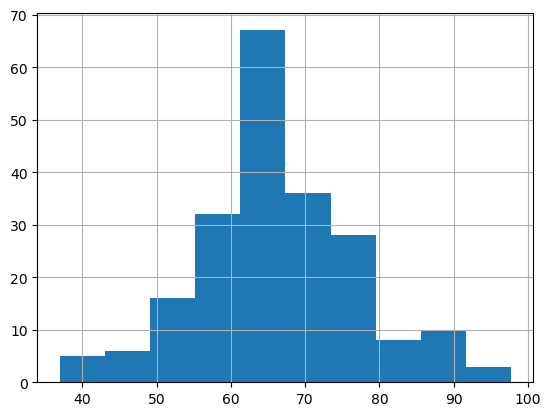

In [48]:
#This shows the original column data with the outliers.
df['hsc_p'].hist()

<Axes: >

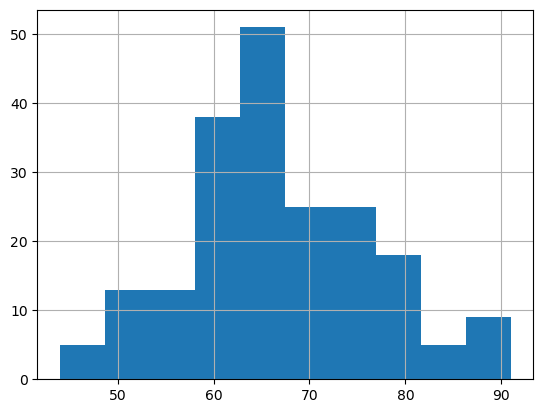

In [49]:
#This shows the new column data with no outliers.
df_no_outlier2['hsc_p'].hist()

In [50]:
#Degree Percentile

In [51]:
#This subtracts Q3 from Q1 for the desired range of data for the degree_p column.
IQR_degree_p =  Q3['degree_p'] - Q1['degree_p']
IQR_degree_p

11.0

In [52]:
#This defines the above and below variables subtracting and adding the standard 1.5 times the IQR to calculate the lower and upper bounds.
below = Q1['degree_p'] - 1.5 * IQR_degree_p 
above = Q3['degree_p'] + 1.5 * IQR_degree_p 

In [53]:
#This creates a new data frame and finds data in the column that is greater than below or less than the bounds.
#This narrows the data in the column to only the data within the bounds and excludes outliers.
df_no_outlier3 = df_no_outlier2.loc[(df_no_outlier2['degree_p'] >= below) & (df_no_outlier2['degree_p'] <= above)] 

In [54]:
#This shows the difference in data frame shape between the previous and new data frames.
df_no_outlier2.shape, df_no_outlier3.shape

((202, 13), (201, 13))

<Axes: >

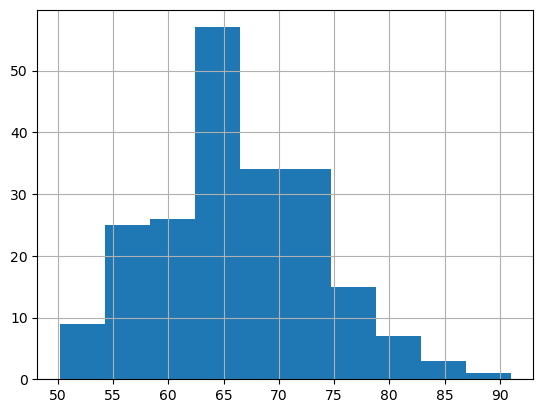

In [55]:
#This shows the original column data.
df['degree_p'].hist()

<Axes: >

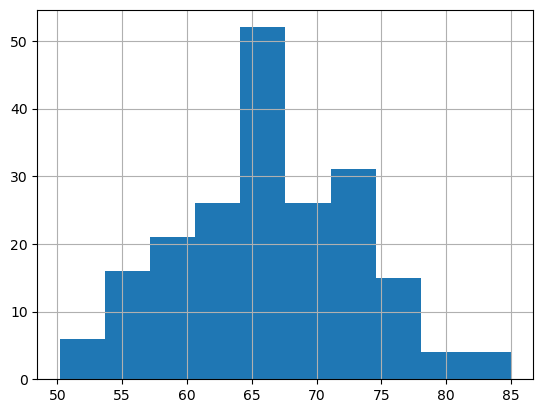

In [56]:
#This shows the new column data with no outliers.
df_no_outlier3['degree_p'].hist()

In [57]:
#Employability test percentile

In [58]:
#This subtracts Q3 from Q1 for the desired range of data for the etest_p column.
IQR_etest_p =  Q3['etest_p'] - Q1['etest_p']
IQR_etest_p

24.0

In [59]:
#This defines the above and below variables subtracting and adding the standard 1.5 times the IQR to calculate the lower and upper bounds.
below = Q1['etest_p'] - 1.5 * IQR_etest_p 
above = Q3['etest_p'] + 1.5 * IQR_etest_p 

In [60]:
#This creates a new data frame and finds data in the column that is greater than below or less than the bounds.
#This narrows the data in the column to only the data within the bounds and excludes outliers.
df_no_outlier4 = df_no_outlier3.loc[(df_no_outlier3['etest_p'] >= below) & (df_no_outlier3['etest_p'] <= above)] 

In [61]:
#This shows the difference in data frame shape between the previous and new data frames.
df_no_outlier3.shape, df_no_outlier4.shape

((201, 13), (201, 13))

In [62]:
#The IQR method found no outliers in this column.

<Axes: >

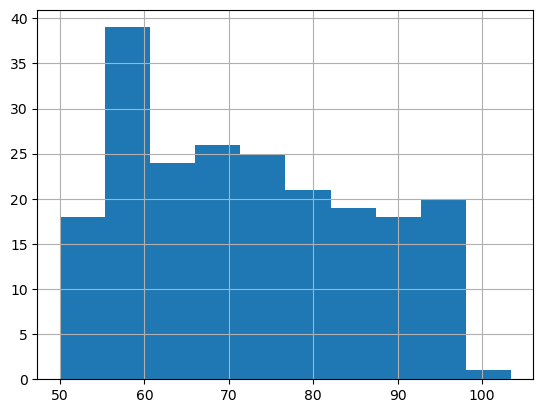

In [63]:
#This shows the original column data.
df['etest_p'].hist()

<Axes: >

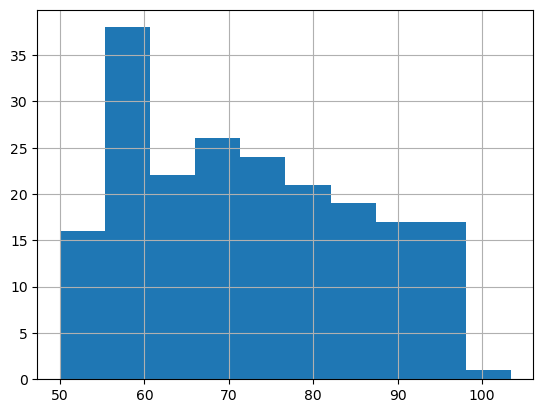

In [64]:
#This shows the new column, note that there was no change.
df_no_outlier4['etest_p'].hist()

In [65]:
#MBA percentile

In [66]:
#This subtracts Q3 from Q1 for the desired range of data for the mba_p column.
IQR_mba_p =  Q3['mba_p'] - Q1['mba_p']
IQR_mba_p

8.425000000000004

In [67]:
#This defines the above and below variables subtracting and adding the standard 1.5 times the IQR to calculate the lower and upper bounds.
below = Q1['mba_p'] - 1.5 * IQR_mba_p 
above = Q3['mba_p'] + 1.5 * IQR_mba_p 

In [68]:
#This creates a new data frame and finds data in the column that is greater than below or less than the bounds.
#This narrows the data in the column to only the data within the bounds and excludes outliers.
df_no_outlier5 = df_no_outlier4.loc[(df_no_outlier4['mba_p'] >= below) & (df_no_outlier4['mba_p'] <= above)] 

In [69]:
#This shows the difference in data frame shape between the previous and new data frames.
df_no_outlier4.shape, df_no_outlier5.shape

((201, 13), (201, 13))

In [70]:
#The IQR method found no outliers in this column.

<Axes: >

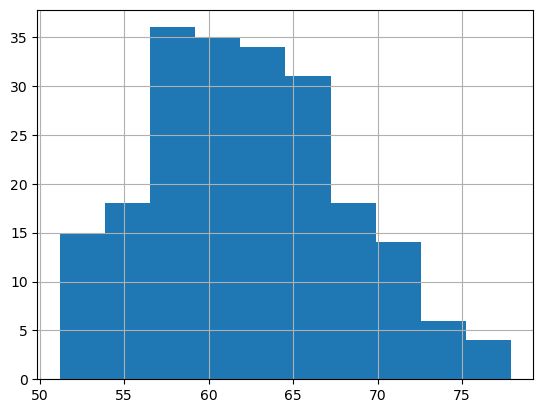

In [71]:
#This shows the original column data.
df['mba_p'].hist()

<Axes: >

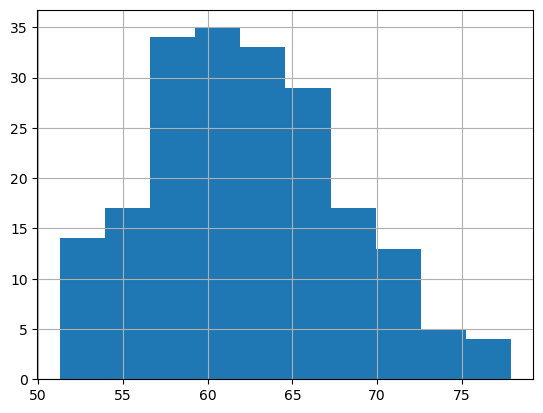

In [72]:
#This shows the new column, note that there was no change.
df_no_outlier5['mba_p'].hist()

array([[<Axes: title={'center': 'ssc_p'}>,
        <Axes: title={'center': 'hsc_p'}>],
       [<Axes: title={'center': 'degree_p'}>,
        <Axes: title={'center': 'etest_p'}>],
       [<Axes: title={'center': 'mba_p'}>, <Axes: >]], dtype=object)

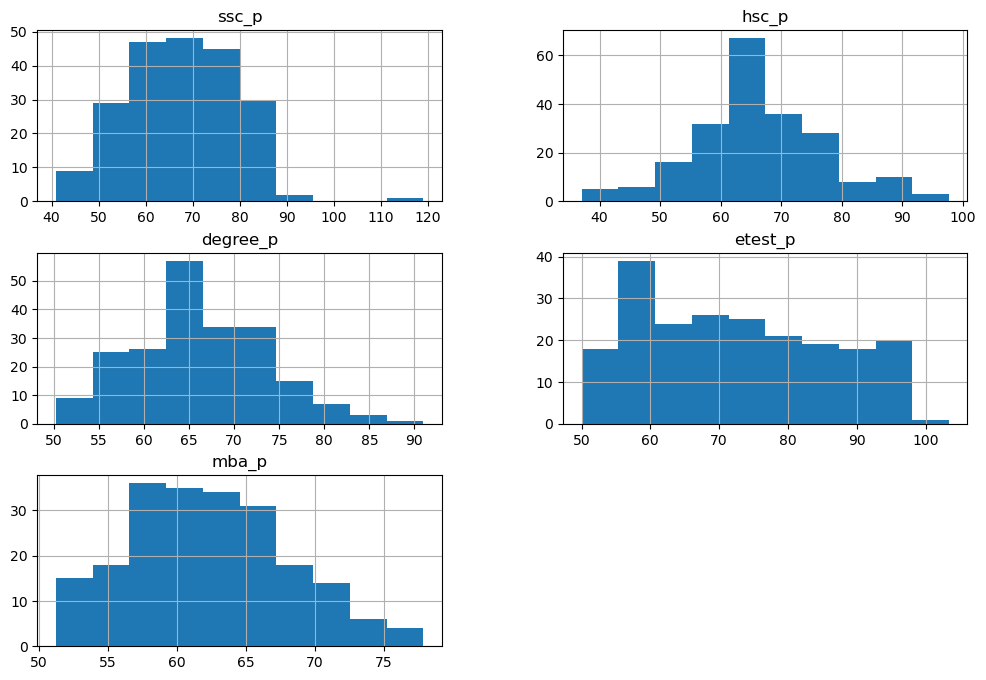

In [73]:
#This shows the original data frame data with the outliers.
df.hist(figsize=(12,8))

array([[<Axes: title={'center': 'ssc_p'}>,
        <Axes: title={'center': 'hsc_p'}>],
       [<Axes: title={'center': 'degree_p'}>,
        <Axes: title={'center': 'etest_p'}>],
       [<Axes: title={'center': 'mba_p'}>, <Axes: >]], dtype=object)

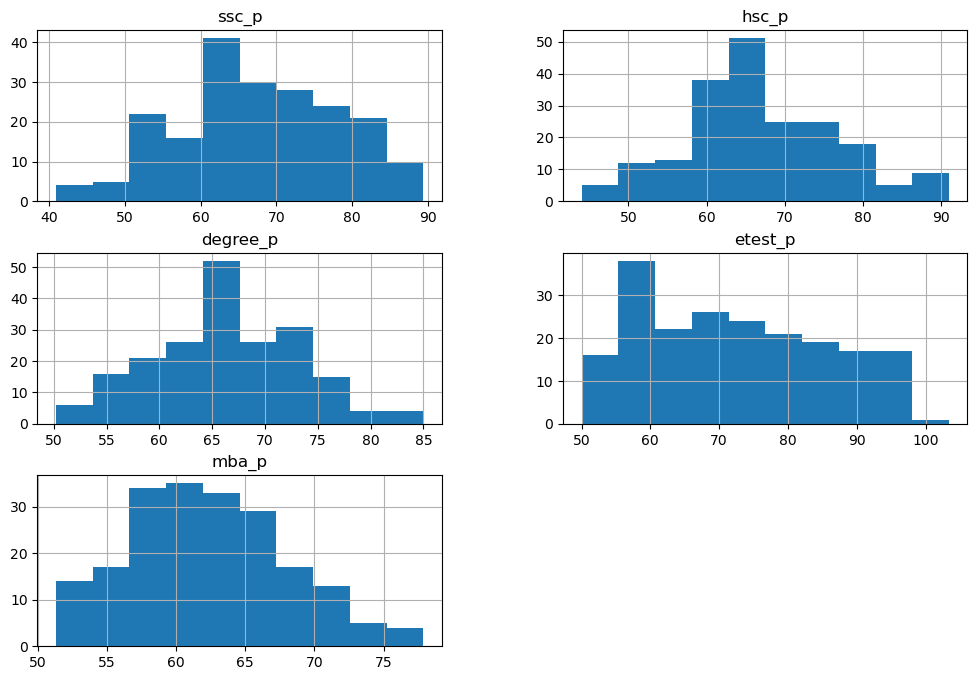

In [74]:
#This shows the new dataframe data with outliers removed.
df_no_outlier5.hist(figsize=(12,8))

In [75]:
#Overall info of the new data frame. Note there are now 199 total values.
df_no_outlier5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          201 non-null    object 
 1   ssc_p           201 non-null    float64
 2   ssc_b           201 non-null    object 
 3   hsc_p           201 non-null    float64
 4   hsc_b           201 non-null    object 
 5   hsc_s           201 non-null    object 
 6   degree_p        201 non-null    float64
 7   degree_t        201 non-null    object 
 8   workex          201 non-null    object 
 9   etest_p         201 non-null    float64
 10  specialisation  201 non-null    object 
 11  mba_p           201 non-null    float64
 12  status          201 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [237]:
#Conclusion: I used inter quartile ranges to establish upper and lower bounds, then eliminate the data points 
#outside those bounds. All of the remaining numeric data is now meaningful and will not skew vizualizations or analysis.
#Next, I used vizualizations to explore some of the non-numeric data and correlations between numeric data.

# 3. Who are these graduates?
#Create 4-5 visualizations providing useful and explanatory information about these graduates. 
#The visualizations should show trends, correlations, and other useful patterns that the data provides.
#Remember, we are dealing with senior management. The charts must be readable, meaningful and at a summary level.
#Use at least one group by and bin in your analysis.

# 1. Academic Performance Across Specializations

In [238]:
#This graph shows that overall Mkt&HR graduates achieved the highest e test percentiles, 
#Mkt&HR and Mkt&Fin graduates had comparable degree and MBA percentiles, 
#and the Mt&HR graduates had the academic lowest percentiles overall.

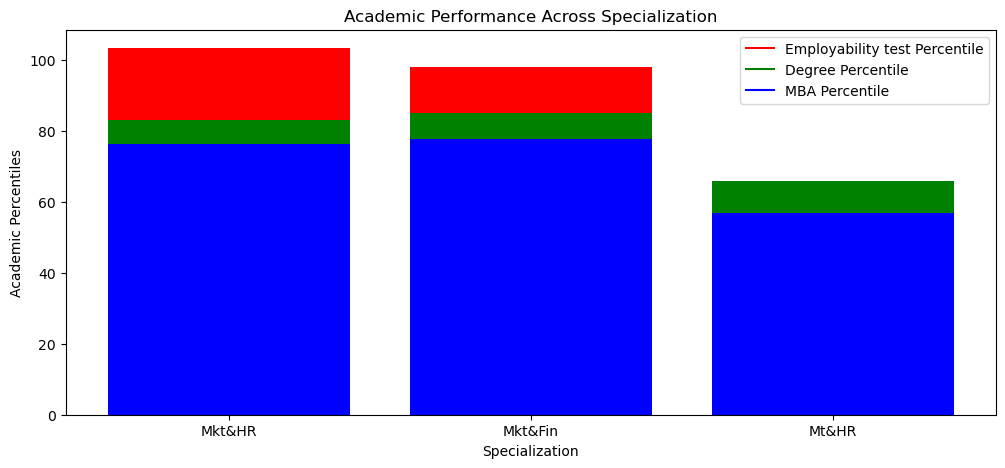

In [239]:
#This module enables stacked bar charts.
import matplotlib.lines as mlines 
#This establishes the size of the chart.
fig = plt.figure(figsize= (12,5))

#This labels the chart.
plt.title('Academic Performance Across Specialization')
plt.xlabel('Specialization')
plt.ylabel('Academic Percentiles')

#This sets specialisation as the x axis and etest_p,degree_p,and mba_p on the y axis.
plt.bar(df_no_outlier5['specialisation'], df_no_outlier5['etest_p'], color = 'r')
plt.bar(df_no_outlier5['specialisation'], df_no_outlier5['degree_p'], color = 'g')
plt.bar(df_no_outlier5['specialisation'], df_no_outlier5['mba_p'], color = 'b')

#This creates the legend.
et = mlines.Line2D([], [], color='red', markersize=10, label='Employability test Percentile')
deg = mlines.Line2D([], [], color='green', markersize=10, label='Degree Percentile')
mba = mlines.Line2D([], [], color='blue', markersize=10, label='MBA Percentile')
plt.legend(handles=[et,deg,mba ])

# 2. Graduate Population by Specializations

In [240]:
#This bar chart gives the above Academic Performance Across Specializations chart more context. 
#We can see below that there are so few Mt&HR graduates that meansurement of their academic percentiles 
#against the other specializations with far more students may not be fairly compared.

In [241]:
#In fact, I would ask the client if this group were mis-entered Mkt&HR entries.

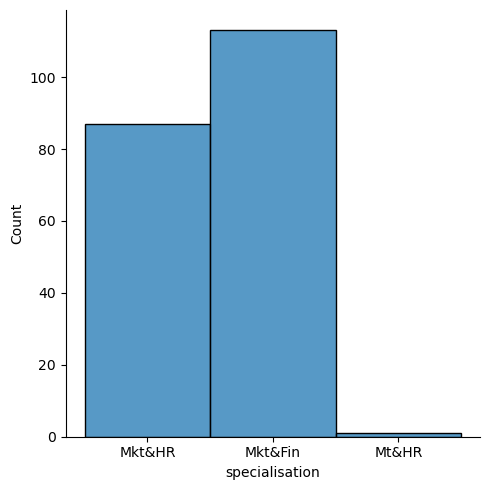

<Figure size 1000x1500 with 0 Axes>

In [242]:
#This uses the sb library to see the graduate specialization population.
sb.displot(df_no_outlier5, x="specialisation", binwidth =5)
fig = plt.figure(figsize=(10, 15))

# 3. Graduate Population by Gender

In [243]:
#This pie chart shows the graduate population by gender, revealing that there are far more male graduates than female.

In [244]:
#This creates a new data frame.
#This separates the different values in the gender column and groups the matching values.
df_no_outlier5_grp = df.groupby(['gender']).size()

<Axes: title={'center': 'Graduates by Gender'}, ylabel='Graduate Gender Percentage'>

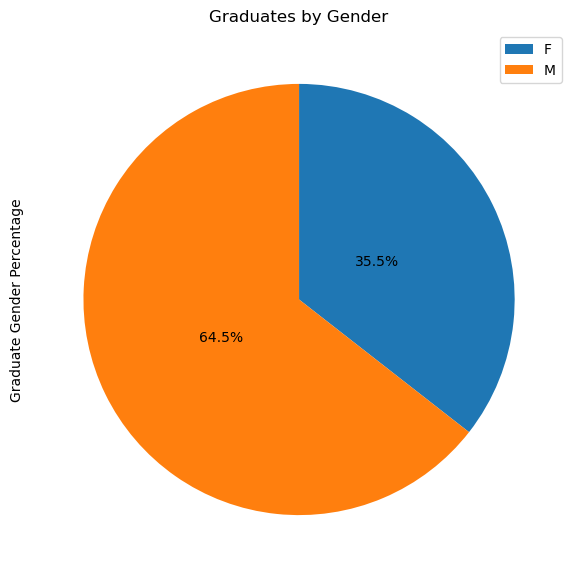

In [245]:
#This uses the new data frame to create a pie chart showing the values by matching group.
df_no_outlier5_grp.plot(kind='pie', autopct='%1.1f%%',
                    title='Graduates by Gender',
                    figsize=(7,7),
                    legend=True,
                    startangle=90, counterclock=False,
                    pctdistance=0.4,
                    label='Graduate Gender Percentage',
                    labels=None)

# 4. Employability Test percentile and Work Experience

In [246]:
#Because this chart compares two different data types, I used a heat map to display correlation. 
#This shows that those graduates without work expereince achieved higher percentiles on the e test, which seems counter intuitive
#and may bring up questions about the effectieness or real-world accuaracy of the test.

Text(95.72222222222221, 0.5, 'Employability Test Percentile')

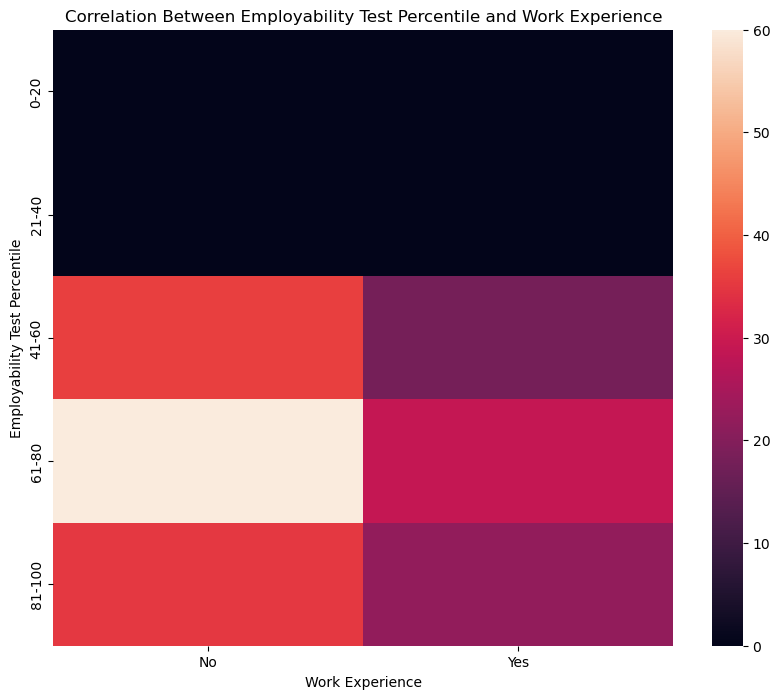

In [325]:
df_no_outlier5_grp_3 = pd.cut(df_no_outlier5['etest_p'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

corr_matrix = df_no_outlier5.groupby([df_no_outlier5_grp_3, 'workex']).size().unstack()

plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix)

plt.title('Correlation Between Employability Test Percentile and Work Experience')
plt.xlabel('Work Experience')
plt.ylabel('Employability Test Percentile')

In [248]:
#Conclusion: Vizualizing this data was the first step to exploring the meaning of the provided data. It revealead
#some potential questions about the accuaracy of specialization data entries, the real-world accuaracy of the e-test,
#and that academic percentiles and gender are worth further exploration, since there were some significant differences in those data.  

#While working on this section, I created many graphs that did not make it into this final draft. 
#Through all of those past drafts and the current, I also confirmed that the academic percentiles 
#(ssc_p, hsc_p, degree_p, etest_p, and mba_p) resulted in significant impacts on placement status when viewd together.
#The chart that I created discovering that is the first in the next section. 

# 4. Who are most likely to get placed?
#Create visualizations to show management qualities specific to those who are likely to get placed at jobs. 
#Show three meaningful visualizations.
#Use at least one group/by or bin in your analysis.

# 1. Academic Percentiles and Placement Status

In [249]:
#This graph shows that every academic percentile given is higher among placed graduates than not placed graduates.

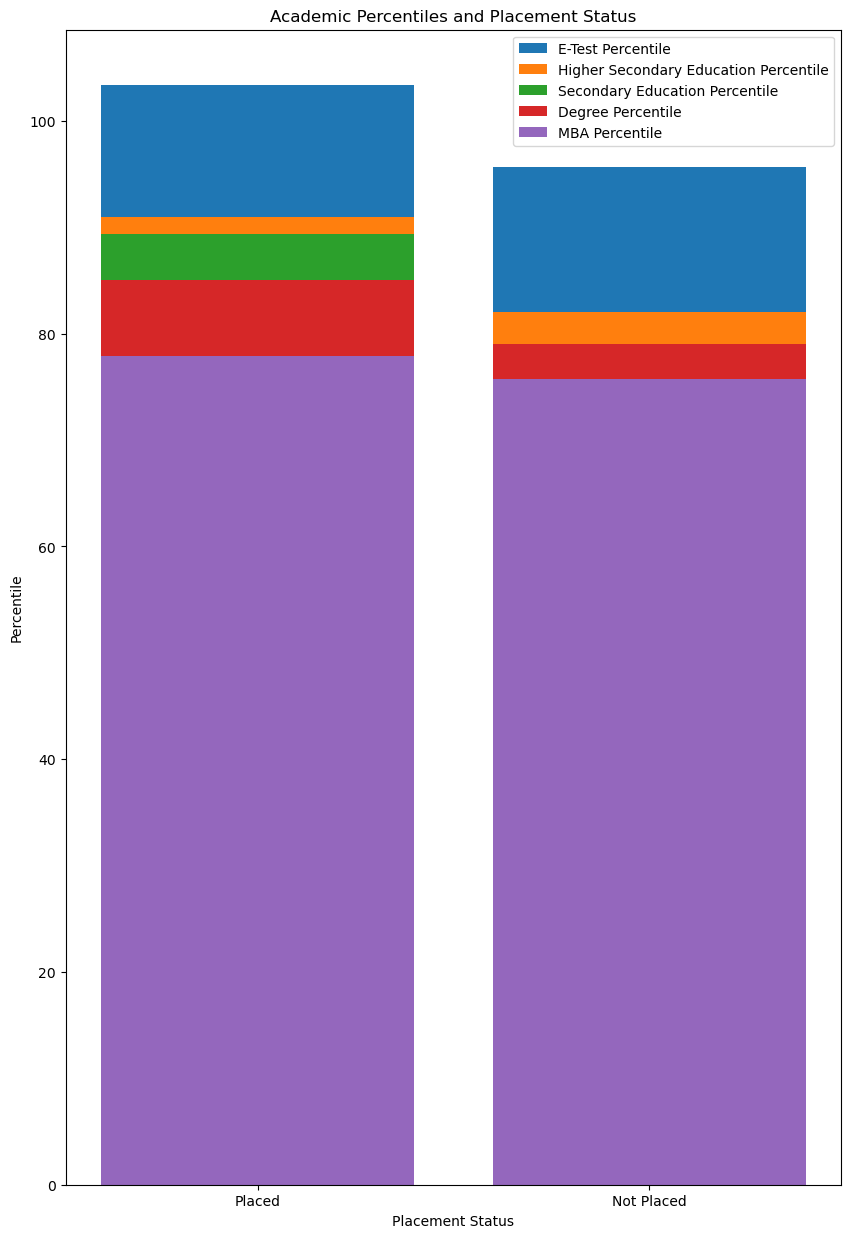

In [250]:
fig = plt.figure(figsize=(10, 15))

#This sets status as the x axis and etest_p,degree_p,and mba_p on the y axis.
plt.bar(df_no_outlier5['status'], df_no_outlier5['etest_p'], label='E-Test Percentile')
plt.bar(df_no_outlier5['status'], df_no_outlier5['hsc_p'], label='Higher Secondary Education Percentile')
plt.bar(df_no_outlier5['status'], df_no_outlier5['ssc_p'], label='Secondary Education Percentile')
plt.bar(df_no_outlier5['status'], df_no_outlier5['degree_p'], label='Degree Percentile')
plt.bar(df_no_outlier5['status'], df_no_outlier5['mba_p'], label='MBA Percentile')

#This adds labels to the chart
plt.xlabel('Placement Status')
plt.ylabel('Percentile')
plt.title('Academic Percentiles and Placement Status')
plt.legend()

# 2. Under Graduation(Degree type) and Placement Status

In [251]:
#This graph shows that the vast majority of graduates placed have Comm&Mgmt degrees.

In [252]:
#This creates a new dataframe.
#This groups the undergraduate degree types of those graduates placed.
df_no_outlier5_grp_4 = df_no_outlier5[df_no_outlier5['status'] == 'Placed'].groupby('degree_t').size()

<Axes: title={'center': 'Placement by Under Graduation(Degree type)'}, ylabel='Percentage of Placed Graduates'>

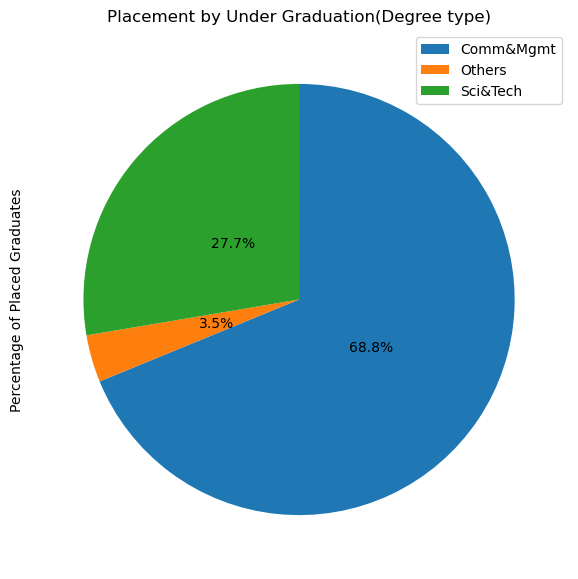

In [253]:
#This creates the pie chart of undergraduate degree types of graduates placed.
df_no_outlier5_grp_4.plot(kind='pie', autopct='%1.1f%%',
                    title='Placement by Under Graduation(Degree type)',
                    figsize=(7,7),
                    legend=True,
                    startangle=90, counterclock=False,
                    pctdistance=0.4,
                    label='Percentage of Placed Graduates',
                    labels=None)

# 3. Gender and Placement Status

In [254]:
#This bar chart compares the genders of graduates who are placed vs. the genders of graduates who are not placed. 
#A far larger proportion of men were placed than perportion of women.

Text(0, 0.5, 'Number of Graduates')

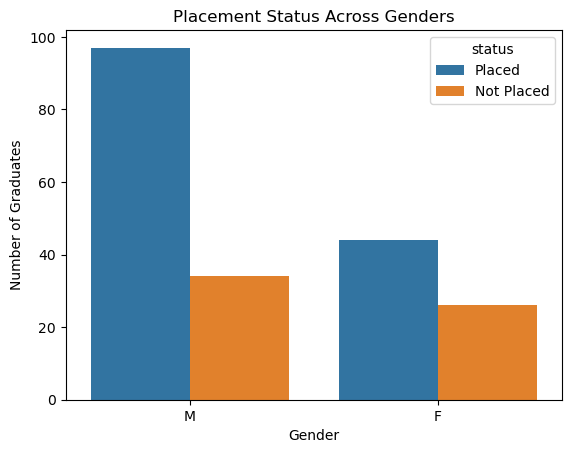

In [255]:
#This counts the number of values in the status and gender columns and creates a bar chart.
sb.countplot(data=df_no_outlier5, x='gender', hue='status', order=df_no_outlier5['gender'].value_counts().index)

#This labels the data
plt.title('Placement Status Across Genders')
plt.xlabel('Gender')
plt.ylabel('Number of Graduates')

In [256]:
#Conclusion: In terms of non-numeric data, most placed graduates had a Comm&Mgmt undergraduate degree
#and most were male. Because the differences were significant, this suggests a potentil link between 
#these attributes and placement status.

#In terms of numeric data, which will be focused on in the next section, the placed graduates trended higher 
#in every measured academic percentile than non placed graduates. This displays a potential link between higher 
#academic performance and placement among graduates.

In [257]:
df_no_outlier5_dummies = pd.get_dummies(df_no_outlier5)

Text(0.5, 1.0, 'Correlation Heatmap')

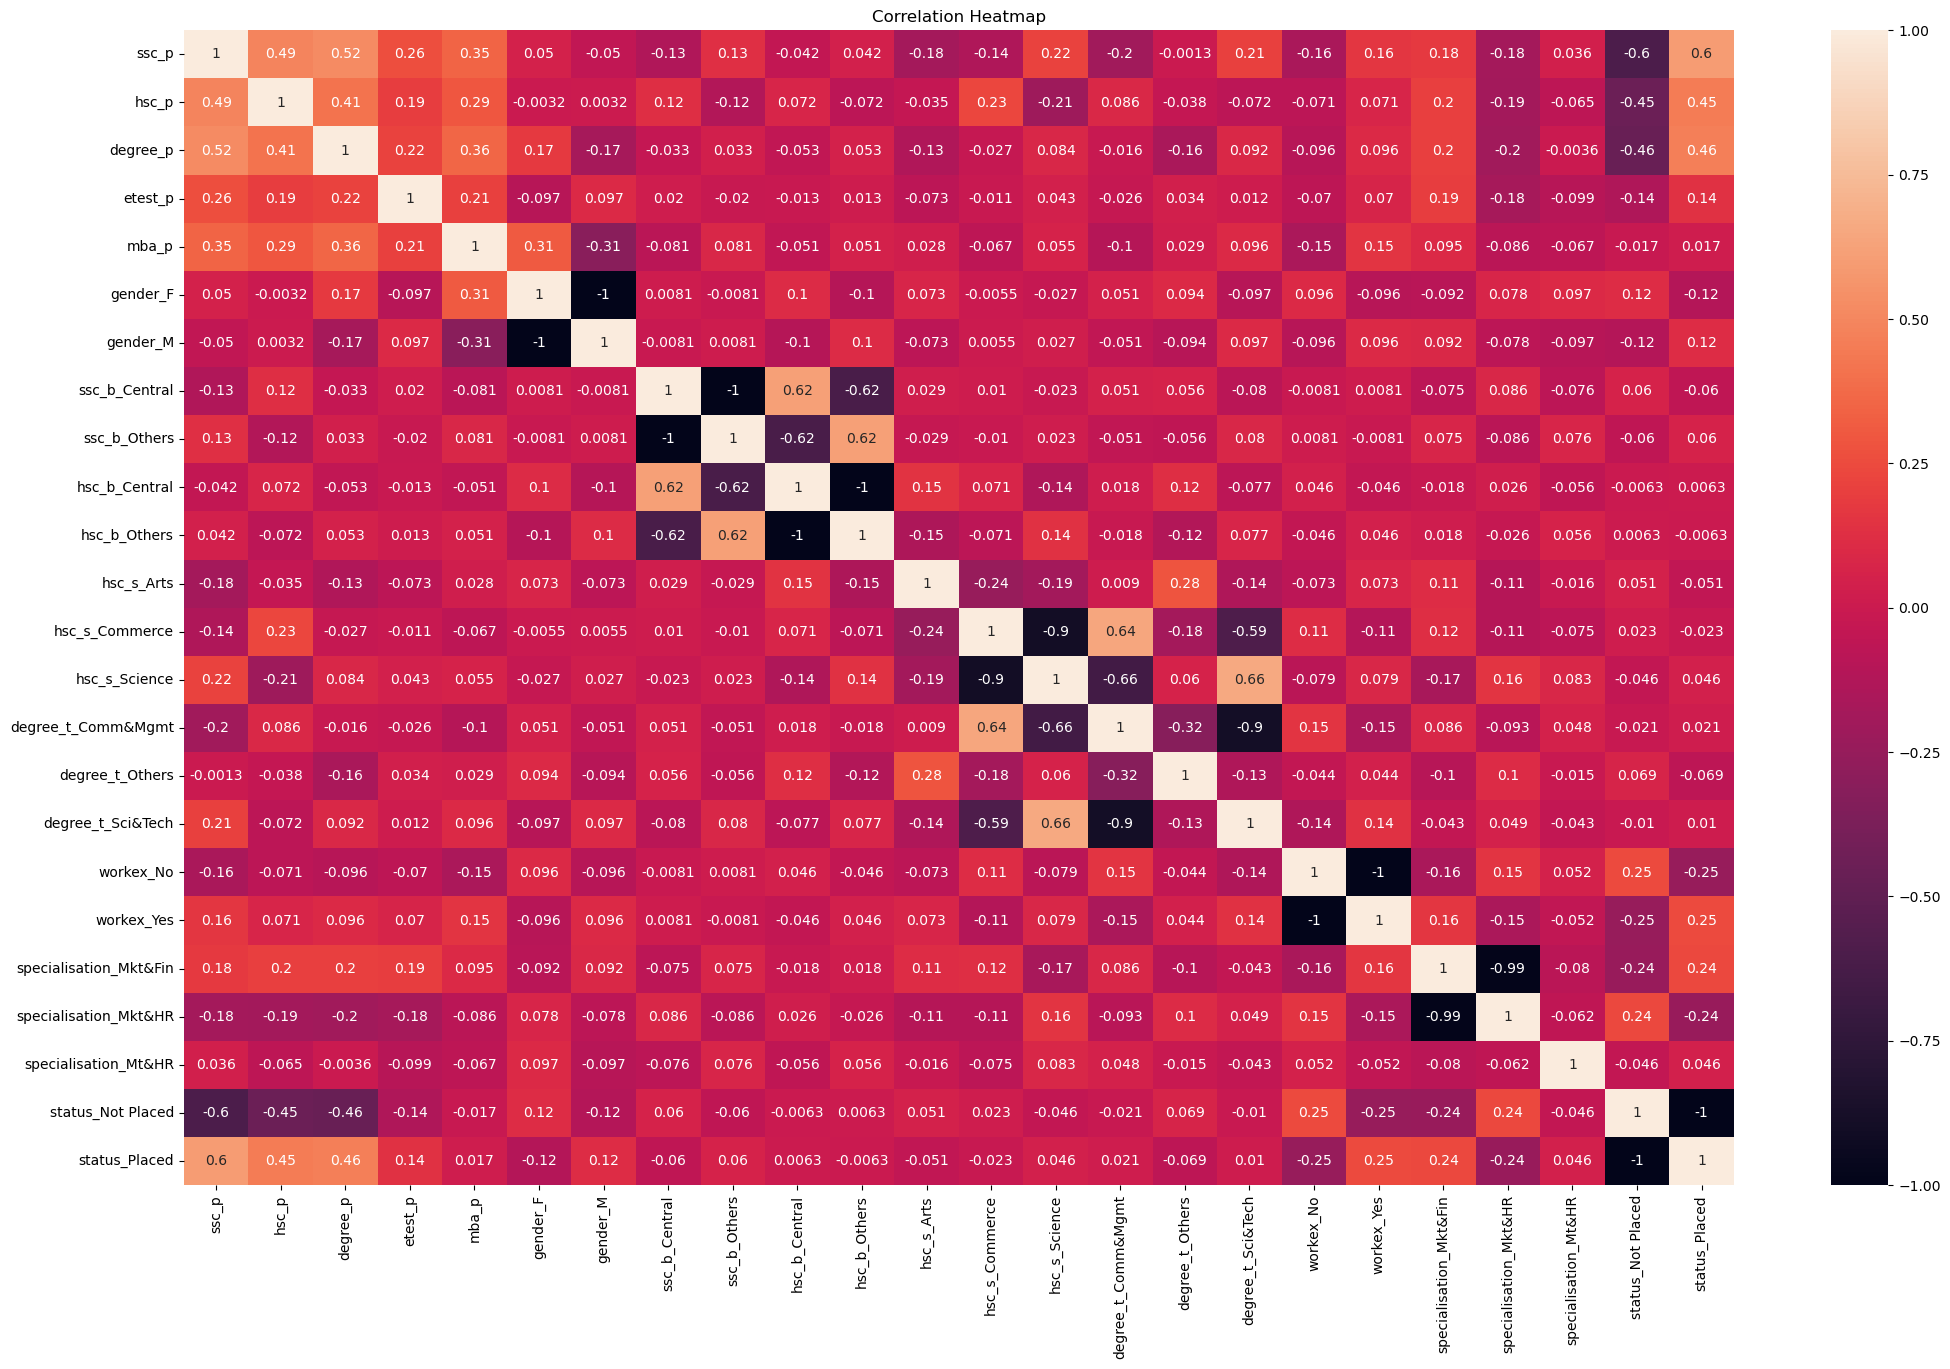

In [258]:
correlation_matrix = df_no_outlier5_dummies.corr()

plt.figure (figsize=(25, 15))
sb.heatmap (correlation_matrix, annot=True,)
plt.title('Correlation Heatmap')

In [259]:
#Looking at this heat map, I can see that I am on the right track. Looking at the placed and not placed statuses, 
#hsc_p, ssc_p, and degree_p are by have the highest correlation with status by far. These are more significant 
#than undergraduate degree type or gender. Work expereinece proved to be an okay correlator, but far less significant 
#than hsc_p, ssc_p, and degree_p. This map also shows proof that hsc_p, ssc_p, and degree_p correlate with each other
#as well. Though they have weaker correlations, I will also include mba_p and etest_p, soas to get a full understanding
#of academic percentiles' impact on status. 
#Therefore, I will treat these 5 factors as a group and utilize that group, academic percentile, for analysis.

# 5. Prepare the data for a regression analysis
#The Gazelle management team has heard that it might be possible to use their data to make predictions.
#They don’t know much about data analytics. We are hoping that an example of what is possible will help them understand better.
#Prepare the data file to run with a regression analysis. Use the techniques and methods discussed in class.

In [260]:
#The placement status of the graduates has been marked by the client as the target variable in the provided data 
#dictionary, so that will guide how I narrow and prepare the data.

In [261]:
#Before starting the regression, I ensured that the original data was set up to be balanced.

In [262]:
#These import the needed libraries and modules for regression analysis.
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [263]:
#This will use an external library to ensure that our data is balanced.
from sklearn.metrics import balanced_accuracy_score

In [264]:
#This imports the original file.
df_new_unbal = pd.read_csv('Placement.csv')

In [ ]:
#run through the cleaned data not original 

In [265]:
#This is copied and pasted from steps one and two. It quickly cleans the data and eliminates outliers, 
#so this is a replica the data from the end of step 2.
df_new_unbal = df_new_unbal.drop('sl_no', axis=1)
df_new_unbal = df_new_unbal.drop('salary', axis=1)
df_new_unbal = df_new_unbal.drop(index=[11,14,16,31])

#Secondary Education percentile
Q1 = df_new_unbal.quantile(0.25)
Q3 = df_new_unbal.quantile(0.75)
IQR = Q3 - Q1

IQR_ssc_p =  Q3['ssc_p'] - Q1['ssc_p']
IQR_ssc_p 
below = Q1['ssc_p'] - 1.5 * IQR_ssc_p
above = Q3['ssc_p'] + 1.5 * IQR_ssc_p
df_new_unbal = df_new_unbal.loc[(df_new_unbal['ssc_p'] > below)  | (df_new_unbal['ssc_p'] < above)] 
df_new_unbal = df_new_unbal.loc[(df['ssc_p'] >= below) & (df['ssc_p'] <= above)] 

#Higher Secondary Education percentile
IQR_hsc_p =  Q3['hsc_p'] - Q1['hsc_p']
IQR_hsc_p 
below = Q1['hsc_p'] - 1.5 * IQR_hsc_p 
above = Q3['hsc_p'] + 1.5 * IQR_hsc_p 
df_new_unbal = df_new_unbal.loc[(df_new_unbal['hsc_p'] >= below) & (df_new_unbal['hsc_p'] <= above)] 

#Degree Percentile
IQR_degree_p =  Q3['degree_p'] - Q1['degree_p']
IQR_degree_p
below = Q1['degree_p'] - 1.5 * IQR_degree_p 
above = Q3['degree_p'] + 1.5 * IQR_degree_p 
df_new_unbal = df_new_unbal.loc[(df_new_unbal['degree_p'] >= below) & (df_new_unbal['degree_p'] <= above)] 

#Employability test percentile
IQR_etest_p =  Q3['etest_p'] - Q1['etest_p']
IQR_etest_p
below = Q1['etest_p'] - 1.5 * IQR_etest_p 
above = Q3['etest_p'] + 1.5 * IQR_etest_p 
df_new_unbal = df_new_unbal.loc[(df_new_unbal['etest_p'] >= below) & (df_new_unbal['etest_p'] <= above)] 

#MBA percentile
IQR_mba_p =  Q3['mba_p'] - Q1['mba_p']
IQR_mba_p
below = Q1['mba_p'] - 1.5 * IQR_mba_p 
above = Q3['mba_p'] + 1.5 * IQR_mba_p 
df_new_unbal = df_new_unbal.loc[(df_new_unbal['mba_p'] >= below) & (df_new_unbal['mba_p'] <= above)] 


/var/folders/cx/ndynydkj54q63s73qyhrjc480000gn/T/ipykernel_52830/3557667897.py:8: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_new_unbal.quantile(0.25)
/var/folders/cx/ndynydkj54q63s73qyhrjc480000gn/T/ipykernel_52830/3557667897.py:9: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_new_unbal.quantile(0.75)


In [266]:
#This proves that it worked, since there were also 201 values at the end of step 2.
df_new_unbal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          201 non-null    object 
 1   ssc_p           201 non-null    float64
 2   ssc_b           201 non-null    object 
 3   hsc_p           201 non-null    float64
 4   hsc_b           201 non-null    object 
 5   hsc_s           201 non-null    object 
 6   degree_p        201 non-null    float64
 7   degree_t        201 non-null    object 
 8   workex          201 non-null    object 
 9   etest_p         201 non-null    float64
 10  specialisation  201 non-null    object 
 11  mba_p           201 non-null    float64
 12  status          201 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [267]:
#This adds a new numerical column basend on the values of the non numerical status column:
#1 for Placed and 0 for Not Placed.
df_new_unbal['status_level'] =1 
df_new_unbal.loc[df['status'] =='Placed', 'status_level'] =1
df_new_unbal.loc[df['status'] =='Not Placed', 'status_level'] =0

In [268]:
#This deletes the status column, so the non numerical values can be replaced with the corresponding numerical of 
#the status_level column.
df_new_unbal = df_new_unbal.drop('status', axis=1)

In [269]:
#This proves that it worked.
df_new_unbal

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status_level
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,1
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,1
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,1
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,1


In [270]:
#This shows the values of the placed and non placed grads.
df_new_unbal['status_level'].value_counts()

1    141
0     60
Name: status_level, dtype: int64

In [271]:
#This converts the non numeric data numeric, which will be necessary for balancing.
df_new_unbal = pd.get_dummies(df_new_unbal)

In [272]:
df_new_unbal.info

<bound method DataFrame.info of      ssc_p  hsc_p  degree_p  etest_p  mba_p  status_level  gender_F  gender_M  \
0    67.00  91.00     58.00     55.0  58.80             1         0         1   
1    79.33  78.33     77.48     86.5  66.28             1         0         1   
2    65.00  68.00     64.00     75.0  57.80             1         0         1   
3    56.00  52.00     52.00     66.0  59.43             0         0         1   
4    85.80  73.60     73.30     96.8  55.50             1         0         1   
..     ...    ...       ...      ...    ...           ...       ...       ...   
210  80.60  82.00     77.60     91.0  74.49             1         0         1   
211  58.00  60.00     72.00     74.0  53.62             1         0         1   
212  67.00  67.00     73.00     59.0  69.72             1         0         1   
213  74.00  66.00     58.00     70.0  60.23             1         1         0   
214  62.00  58.00     53.00     89.0  60.22             0         0         1

In [273]:
#This processes the percentage of each value in status_level.
df_new_unbal['status_level'].value_counts()/len(df_new_unbal)*100

1    70.149254
0    29.850746
Name: status_level, dtype: float64

In [274]:
#This groups the data by status.
df_new_unbal.groupby(['status_level']).count()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,...,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,specialisation_Mt&HR
status_level,,,,,,,,,,,,,,,,,,,,,
0,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
1,141,141,141,141,141,141,141,141,141,141,...,141,141,141,141,141,141,141,141,141,141


In [275]:
#This creates a new data frame and drops all of the non-numerical data. We will only be comparing status to percentiles.
#This works well because percentiles proved to be decent indicators of status.
df_new_unbal = df_new_unbal.drop(columns=['hsc_b_Central', 'hsc_b_Others', 'hsc_s_Arts', 'gender_F', 'gender_M', 'ssc_b_Central', 'ssc_b_Others', 'hsc_s_Commerce', 'specialisation_Mt&HR', 'specialisation_Mkt&HR', 'hsc_s_Science', 'specialisation_Mkt&Fin', 'degree_t_Comm&Mgmt', 'degree_t_Sci&Tech', 'degree_t_Others', 'workex_Yes','workex_No'], axis = 1)

In [79]:
#dont discount categoricals, should use whole data set.
#use select k best to work with whole set and generate f score for each 
#big correcation does not lead to predictive power.

In [276]:
#This confirms that it worked.
df_new_unbal.head(10)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status_level
0,67.00,91.00,58.00,55.00,58.80,1
1,79.33,78.33,77.48,86.50,66.28,1
2,65.00,68.00,64.00,75.00,57.80,1
3,56.00,52.00,52.00,66.00,59.43,0
4,85.80,73.60,73.30,96.80,55.50,1
5,55.00,49.80,67.25,55.00,51.58,0
6,46.00,49.20,79.00,74.28,53.29,0
7,82.00,64.00,66.00,67.00,62.14,1
8,73.00,79.00,72.00,91.34,61.29,1
9,58.00,70.00,61.00,54.00,52.21,0


In [277]:
#Conclusion: The dataframe is narrowed down to academic percentile data and a numeric version of placement status, 
#which are now prepared for regression analysis. These percentiles are what I have seen have a largest impact on placement status.

# 6. Run the regression analysis
#Show the regression scoring. Split the data into training and test sets. Show a confusion matrix for both.
#Two files are attached to this assignment.
#The data file and the Data dictionary which explains every column in the set. 

In [278]:
#Logistical analysis should be used for this data set because there can only be two outcomes, rather than the 
#infinite outcomes that linear regression is meant for.

In [279]:
#Now the goal is to put all of the data found to use. The data that has been cleaned, vizualized, and cleaned again
#will now be analyzed to predict the future statuses of future graduates.

In [280]:
#These import the needed libraries and modules for regression analysis.
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [281]:
#This defines logistical regression as a variable.
lr = LogisticRegression()

In [282]:
#This creates the X independent variable
X= df_new_unbal

In [283]:
#The variable now holds all data except the target.
X= X.drop(['status_level'],axis=1)

In [284]:
#This creates a y variable to hold the target only.
y = df_new_unbal['status_level']

In [285]:
#This confirms that the formula results in logistical regression.
lr.fit(X,y)

LogisticRegression()

In [286]:
#This score defines how well the model fits the data.
lr.score(X,y)

0.845771144278607

In [287]:
#This stores predictions using the above data.
pred = lr.predict(X)

In [288]:
#This utilizes the library and rebalances the dataset, which makes it correct.
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y, pred)

0.7943262411347518

In [289]:
#It is a high number, so it fits well and means that we have a good model and we can move on to testing it.

In [290]:
#This creates an x test variable and passes new data to experiment with how the model predicts.
xtest = [56.45,94.55,38.12,88.45,65.99]
xtest = np.array(xtest).reshape(1, -1)
xtest.shape

(1, 5)

In [291]:
#This uses the above test to make predictions for the target variable.
lr.predict(xtest)

/Users/wendyralston/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [292]:
#It worked, so let's do it again!

In [293]:
#This creates an x test variable and passes new data to experiment with how the model predicts.
xtest= [76.34,55.67,64.22,66.99,98.43]
xtest = np.array(xtest).reshape(1, -1)
xtest.shape

(1, 5)

In [294]:
#This uses the above test to make predictions for the target variable.
lr.predict(xtest)

/Users/wendyralston/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [295]:
#This stores the predicted values in an array
pred_test = lr.predict(X)

In [296]:
#Next is utilizing a confusion matrix, which further checks the model's performance.

In [297]:
#This measures the y from the df_new_unbal dataframe against the predicted values. 
#This tests how well it will work predicting new data.
print(metrics.confusion_matrix(y, pred_test))

[[ 40  20]
 [ 11 130]]


In [298]:
#This displays the confustion matrix results more clearly.
cmtx = pd.DataFrame(
    metrics.confusion_matrix(y,pred_test),  
    index=['actual:yes', 'actual:no'], 
    columns=['pred:yes', 'pred:no']
)
print(cmtx)

            pred:yes  pred:no
actual:yes        40       20
actual:no         11      130


In [299]:
#LogisticRegression uses weight in the lacking variable to balance and solve.
lr=LogisticRegression(class_weight='balanced',solver='lbfgs')
lr.fit(X,y)
lr.score(X,y)

0.8557213930348259

In [300]:
#This again is a high score, proving it fits well.

In [301]:
#The model correctly predicted far more correct yes and no values than incorrect yes and no values. 
#Since it is around the same ratio of correct to incorrect predictions from our model in the class notes, 
#I am comfortable moving forward with using this model.

In [302]:
#This adds a column of predicted outcomes to the dataframe to utilize going forward. 
df_new_unbal['predicted outcome'] = pred_test

In [303]:
#As we can see, the predictions were not perfect, but were close to accurate.
df_new_unbal.head(15)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status_level,predicted outcome
0,67.00,91.00,58.00,55.00,58.80,1,1
1,79.33,78.33,77.48,86.50,66.28,1,1
2,65.00,68.00,64.00,75.00,57.80,1,1
3,56.00,52.00,52.00,66.00,59.43,0,0
4,85.80,73.60,73.30,96.80,55.50,1,1
5,55.00,49.80,67.25,55.00,51.58,0,0
6,46.00,49.20,79.00,74.28,53.29,0,0
7,82.00,64.00,66.00,67.00,62.14,1,1
8,73.00,79.00,72.00,91.34,61.29,1,1
9,58.00,70.00,61.00,54.00,52.21,0,1


In [304]:
#Now I split the data from the updated df_drop dataframe into a training set and a test set. 
#Both variables (academic percentile and stsus) are split into training and a test variables. It keeps with the
#standard that trains are 70% of data, tests are 30% of data. The random state chooses random values from the data set.
#42 is a HGTTG reference that creates the seed/starting point to create a random number.

In [305]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=.3, random_state=42)

In [306]:
#These confirm the shapes of the plit dataset. 

In [307]:
X_train.shape

(140, 5)

In [308]:
y_train.shape

(140,)

In [309]:
X_test.shape

(61, 5)

In [310]:
y_test.shape

(61,)

In [311]:
#This confirms that since there are 201 rows, splits 140 x 61 follow the 70%, 30% data split.
df_new_unbal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 214
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ssc_p              201 non-null    float64
 1   hsc_p              201 non-null    float64
 2   degree_p           201 non-null    float64
 3   etest_p            201 non-null    float64
 4   mba_p              201 non-null    float64
 5   status_level       201 non-null    int64  
 6   predicted outcome  201 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 12.6 KB


In [312]:
#This runs it with the found training set, initiating the machine learning/training.
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [313]:
lr.score(X_train,y_train)

0.85

In [314]:
#This score and means that the model is accurate for ~ 85% of the training data, meaning it fits well.

In [315]:
#This new variable holds the predicted values based on the training dataset. 
pred_train = lr.predict(X_train)

In [316]:
#This better displays the predicted values to target values.
cmtx = pd.DataFrame(
    metrics.confusion_matrix(y_train,pred_train),  
    index=['actual:yes', 'actual:no'], 
    columns=['pred:yes', 'pred:no']
)
print(cmtx)

            pred:yes  pred:no
actual:yes        32        4
actual:no         17       87


In [317]:
#Again, we correctly predicted far more correct yes and no values than incorrect yes and no values. The machine learning 
#used the model well and seems "properly trained", especially since the scores were so close.
#Since it is around the same ratio of correct to incorrect predictions from our model in the class notes, 

In [318]:
#Now it is time to put the training/ machine learning to the test!

In [319]:
#This score tells us how well the new trained model fits against test data.
lr.score(X_test,y_test)

0.8032786885245902

In [320]:
#This is a very high score and means that the model is accurate for > 83% of the data, meaning it fits well.

In [321]:
#This new variable holds the values based on the testing dataset. 
pred_test = lr.predict(X_test)

In [322]:
#This better displays the tested values to target values.
cmtx = pd.DataFrame(
    metrics.confusion_matrix(y_test,pred_test),  
    index=['actual:yes', 'actual:no'], 
    columns=['pred:yes', 'pred:no']
)
print(cmtx)

            pred:yes  pred:no
actual:yes        19        5
actual:no          7       30


In [323]:
#Again, we correctly predicted far more correct yes and no values than incorrect yes and no values. In fact, all of
#the "yes"s tested correctly! This proves that our machine learning executes predicted data well and will give a fairly 
#accurate reading.

In [324]:
#Overall conclusions: After extensive exploration, there are fairly few factors contained in the dataset that actually
#predict impact placement status. If the client's goal of collecting this data is to record impacts on status, I 
#would advise them to stop putting effort into collecting data that did not serve this purpose like serial numbers,
#board of education findings, work expereince, and salary. Alone, secondary education 
#percentiles, higher secondary education percentiles, and degree percentiles are decent correlators to status. Together
#they are excellent predictors. 

#Ultimately, secondary education percentiles, higher secondary education percentiles, MBA percentiles, 
#employment test percentiles, and degree percentiles are very good predictors for graduate status, 
#as higher percentiles are closely correlated to status.